# 0. Preparations

In [10]:
import io
from PIL import Image

from utils import show_image
from inference import image_request

# 1. Image Classification with Simple TensorFlow Model
The following shows the picture that will be posted to (inferencehub.io)[https://www.inferencehub.io/].

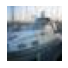

In [2]:
show_image("input_samples/image-tensorflow-simple-img-classifier.jpg")

We can post this picture to our API now, where the TensorFlow Classifier is uploaded:

In [3]:
resp = image_request('tensorflow-simple-img-classifier', "input_samples/image-tensorflow-simple-img-classifier.jpg")
# resp['Payload']

Reading input sample to memory...
Make predict request to inference API...
Response received: "ship"


# 2. Unet

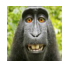

Reading input sample to memory...
Make predict request to inference API...


In [4]:
show_image("input_samples/image-unet.jpg")
resp = image_request('1312131', "input_samples/image-unet.jpg", verbose=False)

In [11]:
# TODO: Need a way to convert string of array to array
# Image.open(io.BytesIO(resp))

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7f89e4add040>